# Cardiovascular Disease Detection (Capstone Project 2)

## 1. Data Wrangling

### 1.1 Importing Libraries

In [2]:
# I begin by importing several libraries that are essential in a data science life cycle.
import pandas as pd # for, inter alia, data wrangling and transformation
import numpy as np # for, inter alia, greater mathematical supportability
import matplotlib.pyplot as plt # for, inter alia, data visualization
import seaborn as sns # for, inter alia, data visualization
from scipy import stats # for, inter alia, statistical procedures

### 1.2 Sourcing and Loading Data

In [3]:
# Sourcing and loading data
path = r'C:\Users\16466\Cardiovascular_disease_case_study\cardio_train.csv'

# The acronym "cvd" stands for cardiovascular disease.
# Note additional argument "sep" to indicate the proper delimiter of the dataset.
cvd = pd.read_csv('cardio_train.csv', sep=';')

# View first few rows of dataset.
cvd.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'cardio_train.csv'

### 1.3 Checking Data Types and Potential Missing Values

In [3]:
# Using the info() method allows me to see both the number of columns and rows in the dataset
# as well as the data type value contained in each column.
cvd.info()

NameError: name 'cvd' is not defined

In [ ]:
# Using the isna().sum() method to check if there are any missing values in the dataset.
cvd.isna().sum()

Note how it is not reasonable to check for duplicate values in this data set, given all columns store *only* numerical values.
As to missing values, there aren't any in this data set.
So, I will be moving on to describing the data set to see if any interesting, and concerning, patterns arise.

### 1.4 Describing Data

In [58]:
# Using the describe() method to get descriptive statistics on the data set.
# As can be seen, some of the summaries do not make much sense --for instance, some variables
# are essentially categorical but have been rendered numerical, so finding the mean or std of them is not helpful. 
# Ignoring these variables (for now), a more pressing matter arises: that of rendering certain variables (e.g., age, height, and weight)
# in a more preferable way for both convenience and clarity. 
cvd.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### 1.4.1 Modifying Age, Height, and Weight Columns

In [59]:
# The age column captures the age of a person in days. Having age rendered this way is unappealing
# and hard to work with, so I will be converting to years.
cvd['age'] = cvd.age.apply(lambda x: x / 365)

In [60]:
# The height column captures the height of a person in centimeters.
# As a matter of preference, I'll be converting to inches.
cvd['height'] = cvd.height.apply(lambda x: x / 2.54)

In [61]:
# The weight column captures the weight of a person in kilograms.
# As a matter of preference, I'll be converting to pounds (lbs).
cvd['weight'] = cvd.weight.apply(lambda x: x * 2.205)

In [62]:
# Changing column names accordingly
cvd = cvd.rename(columns={'age':'age (yr)',
                         'height':'height (in)',
                         'weight':'weight (lb)'})

In [63]:
# Verifying changes
cvd.head(5)

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,61.023622,152.145,130,80,2,2,0,0,1,0
1,989,40.131507,1,64.173228,156.555,110,70,1,1,0,0,1,1
2,990,60.002740,1,64.960630,154.350,120,80,1,1,0,0,1,0
3,991,39.860274,2,64.960630,187.425,120,80,1,1,1,1,1,0
4,992,64.090411,1,61.023622,136.710,120,80,1,1,0,0,1,0


### 1.5 Checking Unique Values

In [64]:
# By using the nunique() method, I can get the unique values of each column in the data set.
# The number of unique values for some of these columns is what is expected, as some columns
# store binary or ternary values.
cvd.nunique()

id             69301
age (yr)        8069
gender             2
height (in)      108
weight (lb)      285
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

### 1.6 Cleaning Data and Dealing with Outliers

In [65]:
# Seeing a descriptive summary of the data set once again is helpful. There still remains many questionable values
# in the data set that have to be dealt with. For instance, the minimum and maximum recorded heights in the data set are 21.7 inches
# and 98.4 inches, respectively. These heights are strickingly abnormal!
# In this subsection, I'll be working with such outliers, seeing if substituting or removing them, all together, is my best choice.
cvd.describe()

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.339140,1.349519,64.709534,163.617675,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.759621,0.476821,3.230448,31.715549,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.583562,1.000000,21.653543,22.050000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.394521,1.000000,62.598425,143.325000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.983562,1.000000,64.960630,158.760000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.427397,2.000000,66.929134,180.810000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,98.425197,441.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### 1.6.1 Dealing with Outliers

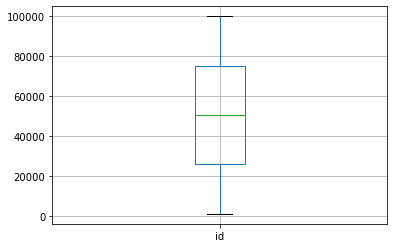

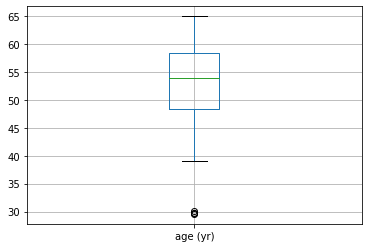

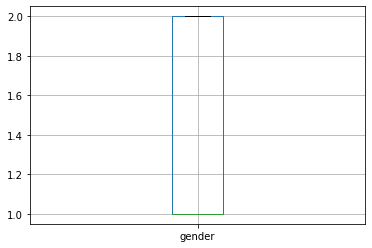

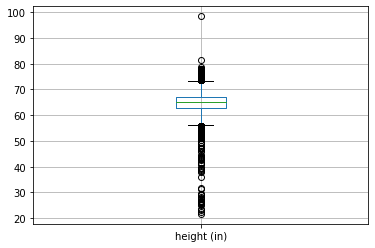

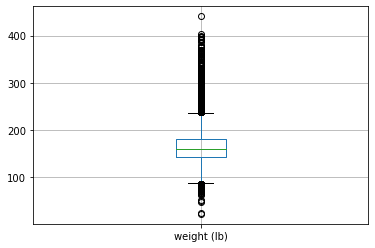

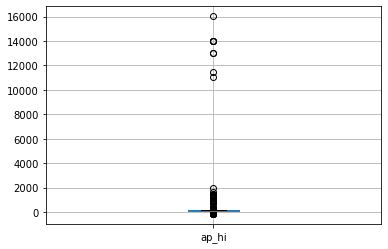

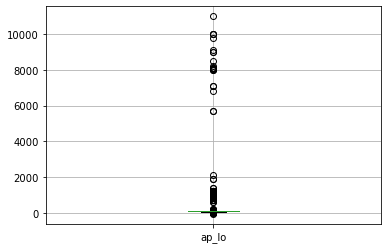

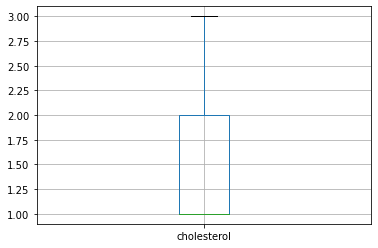

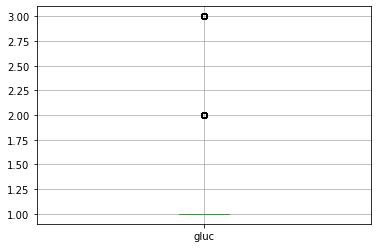

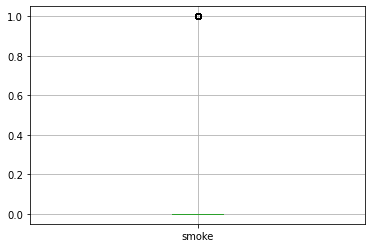

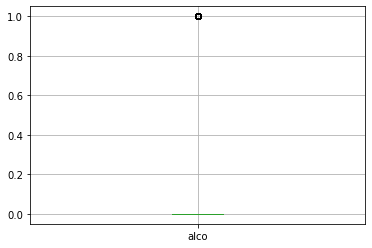

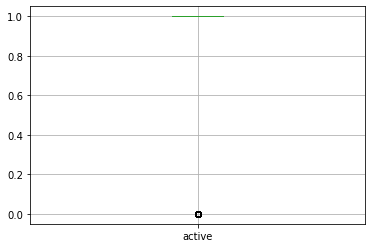

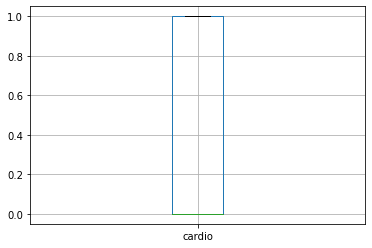

In [66]:
# Using box plots, I will check for outliers in each column of the data set.
for column in cvd:
    plt.figure()
    cvd.boxplot([column])

As can be seen, the variables height, weight, ap_hi, and ap_lo have many outliers, respectively. 

I'm going to check the unique values for each of these variables to get a better idea of how to deal
with the outliers. 

### 1.6.2 Cleaning ap_hi Variable

In [67]:
# Using the unique() method to get unique values in the column.
# There are impossibly low (e.g., negative values) and high values in column.
# Note, the highest blood pressure ever recorded on a human was 370/360.
# Any systolic blood pressure that exceeds 370 is highly likely due to mistaken encoding.
cvd['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [68]:
# Using the abs() method to get rid of negative systolic values.
cvd['ap_hi'] = cvd['ap_hi'].abs()

# Verifying
cvd['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,   909,    70,   109,    85,
         106,   129,    93,     7,    95,   179,   161,   156,   168,
         132,   104,   103,   178,   175,   123,   128,   151,    15,
         139, 11500,   127,    17,   108,   144,   158,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [69]:
# Checking how many systolic readings exceed 370. 
sum(cvd['ap_hi'] > 370)

39

In [70]:
# Checking how many systolic readings are lower than 90.
sum(cvd['ap_hi']  < 90)

310

There are many outliers that have to dealt with; however, it is not clear
on how to deal with them.

In [71]:
# I will drop ap_hi values that are greater than or equal to
# 370 and less than to 90.
cvd.drop(cvd[cvd['ap_hi'] >= 370].index, inplace=True)
cvd.drop(cvd[cvd['ap_hi'] < 90].index, inplace=True)

In [72]:
# Verifying 
cvd['ap_hi'].unique()

array([130, 110, 120, 100, 140, 160, 170, 150, 147, 115,  90, 180, 125,
       135, 190, 137, 153, 145, 148, 126, 105, 220, 119, 141, 165, 164,
       124, 172, 162, 117, 134, 166, 210, 176, 133, 116, 169, 121, 112,
       159, 122, 113, 118, 200, 155, 142, 131, 157, 136, 146, 138, 109,
       106, 129,  93,  95, 179, 161, 156, 168, 132, 104, 103, 178, 175,
       123, 128, 151, 139, 127, 108, 144, 158, 102, 143, 107, 184, 149,
       167, 114, 101, 181, 171, 202, 111, 188, 185, 163, 173, 154, 177,
       174, 240, 191, 197, 152,  96, 199, 193,  99, 196, 309, 230, 207,
       215,  97, 195, 187], dtype=int64)

In [73]:
# These summary statistics seem much more reasonable.
cvd['ap_hi'].describe()

count    68952.000000
mean       127.086785
std         16.995606
min         90.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        309.000000
Name: ap_hi, dtype: float64

### 1.6.3 Cleaning ap_lo Variable

In [74]:
# Proceeding similarly as before, I will check the unique values
# inside this column.
# Note how there are impossibly low and high values. Working with the
# fact stated before, I will state the cutoff points to be both 360 and
# 60. The former because the highest diastolic recorded was 360, so any value
# exceeding this number is highly likely due to mistaken encoding; the latter because
# a reading of lower than 60 is considered low.
cvd['ap_lo'].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,    92,  1044,   108,   115,    68,    61,   106,
         102,    91,    94,    66,    52,   170,   140,    76,   160,
          62,    30,    96,   130,   113,    67,  9100,  1033,    10,
          88,   902,     8,   112,   104,    71,    72,  1008,    98,
          20,   802,  8000,  1022,   850,    40,   708,    57,   101,
        9011,  1011,    64,     0,  1007,  1177,  7100,   109,    45,
         709,    63,  8500,   800,    58,  1110,  8099,  1088,   126,
        1077,  1120,     7,   103,  1125,   180,   121,  8100,   710,
        5700,  8079,  1111,  1003,     6,  1900,   809,   114,   801,
        1002,    53,   111,     1,   118,    56,   182,   810,     9,
        7099, 11000,

In [75]:
# Using abs() method to get rid of negative values.
cvd['ap_lo'] = cvd['ap_lo'].abs()

# Verifying
cvd['ap_lo'].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,    92,  1044,   108,   115,    68,    61,   106,
         102,    91,    94,    66,    52,   170,   140,    76,   160,
          62,    30,    96,   130,   113,    67,  9100,  1033,    10,
          88,   902,     8,   112,   104,    71,    72,  1008,    98,
          20,   802,  8000,  1022,   850,    40,   708,    57,   101,
        9011,  1011,    64,     0,  1007,  1177,  7100,   109,    45,
         709,    63,  8500,   800,    58,  1110,  8099,  1088,   126,
        1077,  1120,     7,   103,  1125,   180,   121,  8100,   710,
        5700,  8079,  1111,  1003,     6,  1900,   809,   114,   801,
        1002,    53,   111,     1,   118,    56,   182,   810,     9,
        7099, 11000,

In [76]:
# Checking how many diastolic readings exceed 360.
sum(cvd['ap_lo'] > 360)

939

In [77]:
# Checking how many diastolic readings are lower than 60.
sum(cvd['ap_lo'] < 60)

145

There are several outliers (i.e., values that either exceed or are lower than self-defined cutoff points).

In [78]:
# I will drop ap_lo values that are strictly less than 60
# and greater than or equal to 360.
cvd.drop(cvd[cvd['ap_lo'] >= 360].index, inplace=True)
cvd.drop(cvd[cvd['ap_lo'] < 60].index, inplace=True)

In [79]:
# Verifying
cvd['ap_lo'].unique()

array([ 80,  70,  90, 100,  60,  79,  78, 110,  84,  75,  85,  86,  87,
        82,  95,  69,  74,  97,  65, 120,  81,  73,  89,  83, 119,  93,
       105, 150,  99,  77,  92, 108, 115,  68,  61, 106, 102,  91,  94,
        66, 170, 140,  76, 160,  62,  96, 130, 113,  67,  88, 112, 104,
        71,  72,  98, 101,  64, 109,  63, 126, 103, 180, 121, 114, 111,
       118, 182, 107, 190, 122, 135, 125], dtype=int64)

In [80]:
# These summary statictics seem much more reasonable.
cvd['ap_lo'].describe()

count    67868.000000
mean        81.415557
std          9.517076
min         60.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        190.000000
Name: ap_lo, dtype: float64

### 1.6.4 Cleaning Weight Variable

In [81]:
# Getting summary statistics on weight variable.
# Results do not seem overtly suspicious since dealing with
# weight values isn't as clear as dealing with blood pressure values.
# Some of these weights, even if seemingly suspicious, cannot
# be solely determined to derived due to encoding error. This issue
# warrants a different approach from the last one (i.e., the one used for
# ap_hi and ap_lo variables).
cvd['weight (lb)'].describe()

count    67868.000000
mean       163.486656
std         31.558616
min         24.255000
25%        143.325000
50%        158.760000
75%        180.810000
max        441.000000
Name: weight (lb), dtype: float64

In [82]:
# Getting quartiles and interquartile range.
Q1 = 143.325
Q3 = 180.810
IQR = Q3 - Q1

# Getting outliers.
weight_lower_boundary = round(Q1 - (1.5 * IQR))
weight_upper_boundary = round(Q3 + (1.5 * IQR))

In [83]:
print('The lower outlier weight treshold is {} lbs.'.format(weight_lower_boundary))

The lower outlier weight treshold is 87 lbs.


In [84]:
print('The upper outlier weight treshold is {} lbs.'.format(weight_upper_boundary))

The upper outlier weight treshold is 237 lbs.


In [85]:
# A natural question to ask is "how many outliers does the weight variable contain?"
print('Number of upper outliers is:', sum(cvd['weight (lb)'] > weight_upper_boundary))
print('Number of lower outliers is:', sum(cvd['weight (lb)'] < weight_lower_boundary))

Number of upper outliers is: 1680
Number of lower outliers is: 48


These outlier thresholds can serve as cutoff points; however, once again, there
isn't a clear-cut method to dealing with such outliers. For example, a weight of 87 pounds
can be easily explained if the person happens to be a child or a sickly person. Similar reasoning can 
explain a weight of 237 pounds, which, on closer inspection, doesn't seem unreasonable. 

In [86]:
# Inspecting observations that fall under lower boundary. 
cvd.loc[cvd['weight (lb)'] < weight_lower_boundary]

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
3053,5306,42.191781,1,47.244094,66.15000,110,70,1,1,0,0,1,0
5095,8226,48.391781,1,59.448819,81.58500,120,80,1,1,0,0,1,0
9748,14908,60.293151,1,63.779528,83.79000,100,70,1,1,0,0,1,0
9928,15182,59.367123,1,60.236220,81.58500,150,80,3,3,0,0,1,1
11177,16963,47.978082,1,61.811024,85.99500,90,70,1,1,0,0,1,0
14023,21040,62.090411,1,56.299213,74.97000,100,70,1,1,0,0,1,0
15623,23318,59.923288,1,64.960630,77.17500,100,70,1,1,0,0,1,0
16207,24167,47.320548,2,66.929134,68.35500,150,90,2,2,0,0,1,1
17860,26503,49.698630,1,62.992126,66.15000,120,80,1,1,0,0,1,1
18883,27965,58.449315,1,59.842520,83.79000,110,80,1,1,0,0,1,0


In [87]:
# Inspecting observations that fall above upper boundary. 
cvd.loc[cvd['weight (lb)'] > weight_upper_boundary]

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
39,1038,51.723288,2,67.322835,249.165,130,80,1,1,0,0,1,0
41,1040,52.043836,1,70.472441,284.445,140,90,3,3,0,0,0,1
52,1051,53.868493,2,72.047244,251.370,120,80,1,1,0,0,0,0
87,1098,51.906849,1,59.842520,273.420,120,80,2,2,0,0,1,1
95,1109,56.131507,1,69.291339,264.600,150,90,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69174,99799,54.071233,2,74.015748,238.140,130,80,2,2,0,1,0,1
69247,99925,58.446575,1,64.566929,253.575,130,80,1,1,0,0,1,1
69248,99930,63.849315,2,67.716535,249.165,110,80,1,1,0,0,0,1
69282,99972,47.945205,2,71.653543,242.550,130,90,2,2,0,0,1,1


<Figure size 1080x360 with 0 Axes>

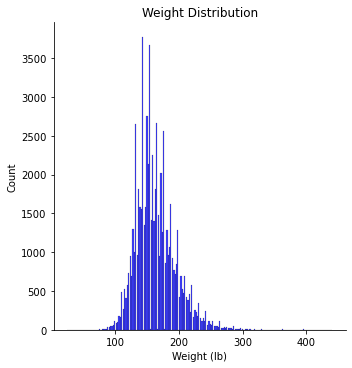

In [88]:
# I will check the distribution of the weight column to see if any ideas come up.
plt.figure(figsize=(15,5))
sns.displot(cvd['weight (lb)'], color='blue')
plt.title('Weight Distribution')
plt.ylabel('Count')
plt.xlabel('Weight (lb)');

I will not remove outliers due to the reasons stated above. 
Moving on to the height variable. 

### 1.6.5 Cleaning Height Variable

In [89]:
# Getting summary statistics of height variable.
# There are some suspicious values (e.g., the minimum height is about 21 inches and the
# maximum height is about 98 inches).
# Note the shortest recorded height is about 21.5 inches.
cvd['height (in)'].describe()

count    67868.000000
mean        64.713497
std          3.219576
min         21.653543
25%         62.598425
50%         64.960630
75%         66.929134
max         98.425197
Name: height (in), dtype: float64

In [90]:
# Getting quartiles and interquartile range.
Q_1 = 62.598425
Q_3 = 66.929134
IQR_2 = Q_3 - Q_1

# Getting outliers.
height_lower_boundary = round(Q_1 - (1.5 * IQR_2))
height_upper_boundary = round(Q3 + (1.5 * IQR_2))

In [91]:
print('The lower outlier height treshold is {} inches.'.format(height_lower_boundary))

The lower outlier height treshold is 56 inches.


In [92]:
print('The upper outlier height treshold is {} inches.'.format(height_upper_boundary))

The upper outlier height treshold is 187 inches.


In [93]:
# A natural question to ask is "how many outliers does the height variable contain?"
print('Number of upper outliers is:', sum(cvd['height (in)'] > height_upper_boundary))
print('Number of lower outliers is:', sum(cvd['height (in)'] < height_lower_boundary))

Number of upper outliers is: 0
Number of lower outliers is: 242


In [94]:
# Checking the total amount of values that have a z-score of less than 3.
sum(np.abs(stats.zscore(cvd['height (in)'])) < 3)

67583

The majority of values in the height column have a z-score of less than 3. Getting rid of values that are greater than or equal to 3 might be helpful in the analysis.

In [95]:
# Subsetting dataset
cvd = cvd[(np.abs(stats.zscore(cvd['height (in)'])) < 3)]

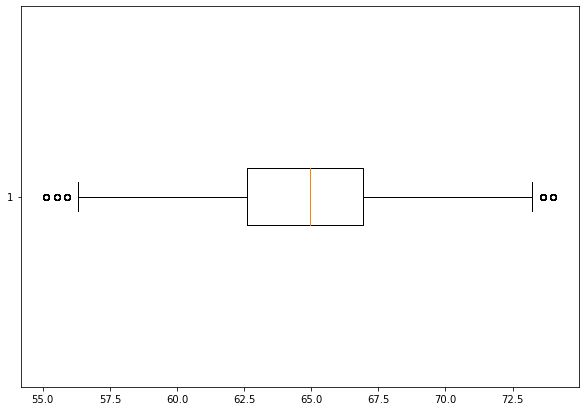

In [97]:
# Viewing height column after cleaning.
fig = plt.figure(figsize =(10, 7))
plt.boxplot(cvd['height (in)'], vert = 0)
plt.show()

The height column now has considerably fewer outliers than before.

### 1.6.6 Exploring Data after Cleaning

In [99]:
# Checking "shape" of dataset
# There less rows, as expected.
cvd.shape

(67583, 13)

In [101]:
# Getting, once again, summary statistics on dataset.
# Overall, the dataset is looking much more cleaned.
cvd.describe()

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000,67583.000000
mean,50476.223754,53.334969,1.348090,64.731847,163.398151,126.715787,81.417709,1.365107,1.226122,0.087626,0.053534,0.804004,0.495346
std,28553.838349,6.758531,0.476368,3.033900,31.374307,16.628343,9.513792,0.679370,0.572138,0.282752,0.225098,0.396968,0.499982
min,988.000000,29.583562,1.000000,55.118110,24.255000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25763.500000,48.393151,1.000000,62.598425,143.325000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50520.000000,53.980822,1.000000,64.960630,158.760000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75115.000000,58.424658,2.000000,66.929134,180.810000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,74.015748,441.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
